In [143]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kaggle
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [144]:
# Initialize the connection
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [145]:
# using api to download the test data
api.competition_download_file('titanic','test.csv')

test.csv: Skipping, found more recently modified local copy (use --force to force download)


In [146]:
# training data
api.competition_download_file('titanic','train.csv')

train.csv: Skipping, found more recently modified local copy (use --force to force download)


In [147]:
# convering the train and test data into a pandas dataframe
Test=pd.read_csv(r'C:\Users\user\I am learning ML\Titanic Kaggle Competition\test.csv')
Train=pd.read_csv(r'C:\Users\user\I am learning ML\Titanic Kaggle Competition\train.csv')

In [148]:
print("Training data")
print(Train.info())
print("Test data")
print(Test.info())

Training data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Test data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-

In [149]:
Train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [150]:
Test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<AxesSubplot:xlabel='Survived', ylabel='count'>

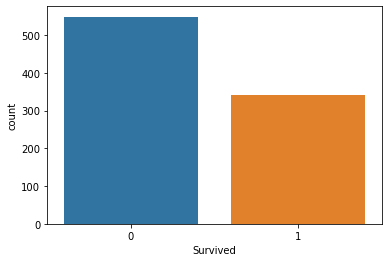

In [151]:
# drawing insights from the data
# how many people survived?
sns.countplot(x='Survived',data=Train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

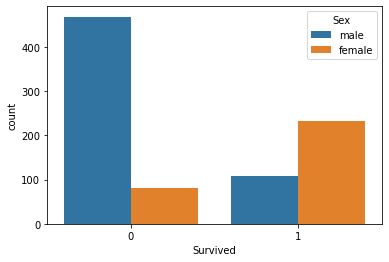

In [152]:
# how many females and males survived and how many did not 
sns.countplot(x='Survived',data=Train,hue='Sex')

In [153]:
# checking for null values
Train.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


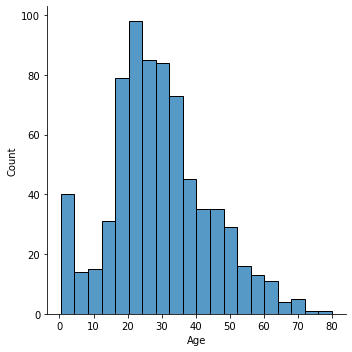

In [154]:
# age distribution for all the passengers
sns.displot(x="Age",data=Train)

In [155]:
# check for how many null values there are in each column
Train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [156]:
# null values in the test data set
Test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

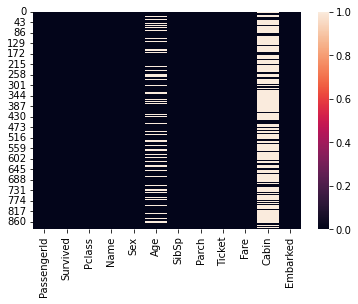

In [157]:
# visualize the null values
sns.heatmap(Train.isna())

<AxesSubplot:>

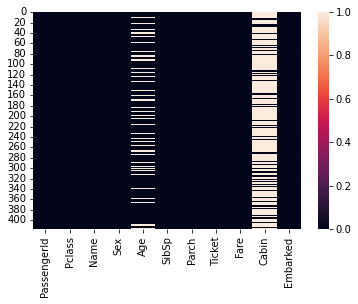

In [158]:
sns.heatmap(Test.isna())

In [159]:
# percentage of null values in the three columns in training data
print("Null values in Age column:",(Train['Age'].isna().sum()/len(Train['Age']))*100,'percent')
print("Null values in Cabin column:",(Train['Cabin'].isna().sum()/len(Train['Cabin']))*100,"percent")
print("Null values in Embarked column:",(Train['Embarked'].isna().sum()/len(Train['Embarked']))*100,"percent")
# percentage of null values in the three columns in test data
print("Null values in Age column:",(Test['Age'].isna().sum()/len(Test['Age']))*100,'percent')
print("Null values in Cabin column:",(Test['Cabin'].isna().sum()/len(Test['Cabin']))*100,"percent")
print("Null values in Fare column:",(Test['Fare'].isna().sum()/len(Test['Fare']))*100,"percent")

Null values in Age column: 19.865319865319865 percent
Null values in Cabin column: 77.10437710437711 percent
Null values in Embarked column: 0.22446689113355783 percent
Null values in Age column: 20.574162679425836 percent
Null values in Cabin column: 78.22966507177034 percent
Null values in Fare column: 0.23923444976076555 percent


In [160]:
# fill null values in the age column in the training
Train["Age"].fillna(Train["Age"].mean(),inplace=True)
print("Number of null values in Training Age column:",Train["Age"].isna().sum())
# fill null values in the age column in the test data
Test["Age"].fillna(Test["Age"].mean(),inplace=True)
print("Number of null values in Testing Age column:",Test["Age"].isna().sum())
# fill null values in the fare column in the test data
Test["Fare"].fillna(Test["Fare"].mean(),inplace=True)
print("Number of null values in Testing Fare column:",Test["Age"].isna().sum())

Number of null values in Training Age column: 0
Number of null values in Testing Age column: 0
Number of null values in Testing Fare column: 0


In [161]:
# drop the cabin column
Train.drop('Cabin',axis=1,inplace=True)
Test.drop('Cabin',axis=1,inplace=True)

In [162]:
Train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [163]:
Test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S


In [164]:
# drop columns not needed
Train.drop(["Ticket","Embarked","Name"],axis=1,inplace=True)
Test.drop(["Ticket","Embarked","Name"],axis=1,inplace=True)

In [165]:
Train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.000000,1,0,7.2500
1,2,1,1,female,38.000000,1,0,71.2833
2,3,1,3,female,26.000000,0,0,7.9250
3,4,1,1,female,35.000000,1,0,53.1000
4,5,0,3,male,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000
887,888,1,1,female,19.000000,0,0,30.0000
888,889,0,3,female,29.699118,1,2,23.4500
889,890,1,1,male,26.000000,0,0,30.0000


In [166]:
Test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,male,34.50000,0,0,7.8292
1,893,3,female,47.00000,1,0,7.0000
2,894,2,male,62.00000,0,0,9.6875
3,895,3,male,27.00000,0,0,8.6625
4,896,3,female,22.00000,1,1,12.2875
...,...,...,...,...,...,...,...
413,1305,3,male,30.27259,0,0,8.0500
414,1306,1,female,39.00000,0,0,108.9000
415,1307,3,male,38.50000,0,0,7.2500
416,1308,3,male,30.27259,0,0,8.0500


In [167]:
# convert the sex column into numeric values
Sex=pd.get_dummies(Train['Sex'],drop_first=True)
# create a new column
Train['Sex']=Sex

In [168]:
Sex=pd.get_dummies(Test['Sex'],drop_first=True)
Test['Sex']=Sex

In [169]:
Train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.000000,1,0,7.2500
1,2,1,1,0,38.000000,1,0,71.2833
2,3,1,3,0,26.000000,0,0,7.9250
3,4,1,1,0,35.000000,1,0,53.1000
4,5,0,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000
887,888,1,1,0,19.000000,0,0,30.0000
888,889,0,3,0,29.699118,1,2,23.4500
889,890,1,1,1,26.000000,0,0,30.0000


In [170]:
Train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [171]:
# split the data into X and Y 
XTrain = Train.drop("Survived", axis=1)
YTrain = Train["Survived"]
XTest=Test
print(XTrain.shape)
print(YTrain.shape)
print(XTest.shape)

(891, 7)
(891,)
(418, 7)


In [172]:
XTrain=XTrain.to_numpy()
print(XTrain.shape)
YTrain=YTrain.to_numpy()
print(YTrain.shape)
XTest=XTest.to_numpy()
print(XTest.shape)

(891, 7)
(891,)
(418, 7)


In [173]:
# # reshape the arrays
# XTrain1=XTrain.T
# print(XTrain.shape)
# # YTrain=YTrain.reshape(-1,1)
# # print(YTrain.shape)
# XTest=XTest.T
# print(XTest.shape)

In [174]:
model=LogisticRegression(max_iter=10000)
model.fit(XTrain,YTrain)
print(model.intercept_)
print(model.coef_)

[4.73646891]
[[ 8.07014013e-05 -1.04738571e+00 -2.65505449e+00 -3.88276194e-02
  -3.37239191e-01 -1.03129368e-01  3.02699623e-03]]


In [175]:
predict=model.predict(XTest)

In [176]:
acc_log = round(model.score(XTrain, YTrain) * 100, 2)
acc_log

79.8

In [177]:
Submission = pd.DataFrame({"PassengerId": Test["PassengerId"],"Survived": predict})
Submission.to_csv('Submission.csv', index=False)